# A. Cálculo Computacional

In [1]:
import math #importa biblioteca matemática básica do Python
import numpy as np #importa módulo de cálculo numérico NumPy
from uncertainties import ufloat #importa biblioteca ufloat do módulo Uncertainties
                                #para cálculo de propagação de incertezas
from uncertainties.umath import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') #Importa e configura biblioteca para exibição de gráficos

# Cálculos Computacionais Referentes ao Experimento de Determinação da Carga Elementar - Experimento de Millikan
Experimento Realizado dia 28 de Agosto de 2019 para disciplina Laboratório de Física Moderna do Curso de Licenciatura em Física, CCENS-UFES

In [2]:
#Definição das constantes
rho_o = 1.03e3 #Densidade do óleo de silicone (Kg/m³)
rho_a = 1.293 #Densidade do ar a temperatura ambiente (Kg/m³)
n = 1.82e-5 #Coeficiente de viscosidade do ar (Kg/m*s)
g = 9.79 #Aceleração da gravidade (m/s²)
d = ufloat(2.5e-3,0.01e-3) #Distância das placas do capacitor (m)
S = ufloat(8.9e-4,0.1e-4) #Altura da escala do capacitor (m)
dt = 0.001 #Incerteza do tempo (s)

In [3]:
def particle_speed(ts,td,grid): #Função para cálculo da velocidade
    vs = (grid/30*S)/(ufloat(ts,dt))
    vd = (grid/30*S)/(ufloat(td,dt))
    return [vs,vd]

In [4]:
#Lista de tempos obtidos com o software Tracker [subida,descida]
tlist = [[5.903,3.668],
         [4.268,2.668],
         [3.602,2.633],
         [4.603,2.935],
         [3.970,2.635],
         [7.372,4.535],
         [4.769,3.668],
         [4.570,5.837],
         [5.603,4.770],
         [7.603,5.804],
         [6.403,5.103],
         [11.340,7.737],
         [12.874,8.339],
         [6.570,5.136],
         [7.084,5.202],
         [11.030,8.220],
         [15.856,10.278],
         [15.016,7.926],
         [7.926,7.215],
         [8.136,5.830]]
vlist = [0.]*20 #Inicia lista vazia para as velocidades

In [5]:
#Calculos para as velocidades
for i in range(0,5,1):
    vlist[i] = particle_speed(tlist[i][0],tlist[i][1],30)
    print(vlist[i])
for i in range(5,10,1):
    vlist[i] = particle_speed(tlist[i][0],tlist[i][1],60)
    print(vlist[i])
for i in range(10,15,1):
    vlist[i] = particle_speed(tlist[i][0],tlist[i][1],90)
    print(vlist[i])
for i in range(15,20,1):
    vlist[i] = particle_speed(tlist[i][0],tlist[i][1],120)
    print(vlist[i])

[0.00015077079451126545+/-1.6942464047161092e-06, 0.00024263904034896398+/-2.7270837655557358e-06]
[0.0002085285848172446+/-2.343527172499188e-06, 0.00033358320839580206+/-3.7502107724379264e-06]
[0.00024708495280399776+/-2.777082754840255e-06, 0.0003380174705658944+/-3.8001181768527006e-06]
[0.00019335216163371714+/-2.1729022546703778e-06, 0.00030323679727427597+/-3.4087211486670034e-06]
[0.0002241813602015113+/-2.5195245714025444e-06, 0.00033776091081593926+/-3.797230548660679e-06]
[0.00024145415084102006+/-2.713165687679053e-06, 0.000392502756339581+/-4.410992522507405e-06]
[0.00037324386663870827+/-4.194481541499142e-06, 0.00048527808069792795+/-5.4541675311114715e-06]
[0.0003894967177242888+/-4.3771974469985236e-06, 0.0003049511735480555+/-3.42681595774288e-06]
[0.0003176869534178119+/-3.5699666189318903e-06, 0.0003731656184486373+/-4.193601889210435e-06]
[0.00023411811127186635+/-2.6307207990677387e-06, 0.0003066850447966919+/-3.446304489095035e-06]
[0.0004169920349836014+/-4.685

In [6]:
rlist = [0.]*20 #Inicia lista vazia de raios
Qlist = [0.]*20 #inicia lista vazia de cargas

In [7]:
#Cálculo do raio de cada gota
def particle_radius(vs,vd):
    if (vs - vd) < 0:
        V = (vs - vd) * -1
    else:
        V = (vs - vd)
    r = (3/2)*sqrt(n/(g*(rho_o-rho_a)))*sqrt(V)
    return r

In [8]:
for i in range(0,20,1):
    rlist[i] = particle_radius(vlist[i][0],vlist[i][1])
    print(rlist[i])

(6.112+/-0.034)e-07
(7.13+/-0.04)e-07
(6.081+/-0.035)e-07
(6.68+/-0.04)e-07
(6.80+/-0.04)e-07
(7.84+/-0.04)e-07
(6.75+/-0.04)e-07
(5.863+/-0.033)e-07
(4.750+/-0.027)e-07
(5.432+/-0.031)e-07
(6.57+/-0.04)e-07
(6.68+/-0.04)e-07
(6.77+/-0.04)e-07
(6.79+/-0.04)e-07
(7.45+/-0.04)e-07
(6.70+/-0.04)e-07
(7.04+/-0.04)e-07
(9.29+/-0.05)e-07
(4.242+/-0.024)e-07
(8.39+/-0.05)e-07


In [9]:
#Cálculo da carga de cada gota
def particle_charge(vs,vd,U):
    if (vs - vd) < 0:
        V = (vs - vd) * -1
    else:
        V = (vs - vd)
    Q = ((9*math.pi*d)/2)*sqrt(n**3/(g*(rho_o-rho_a)))*(((vs+vd)/U)*sqrt(V))
    return Q

In [10]:
for i in range(0,5,1):
    Qlist[i] = particle_charge(vlist[i][0],vlist[i][1],ufloat(300,5))
    print(Qlist[i])
for i in range(5,10,1):
    Qlist[i] = particle_charge(vlist[i][0],vlist[i][1],ufloat(400,5))
    print(Qlist[i])
for i in range(10,15,1):
    Qlist[i] = particle_charge(vlist[i][0],vlist[i][1],ufloat(500,5))
    print(Qlist[i])
for i in range(15,20,1):
    Qlist[i] = particle_charge(vlist[i][0],vlist[i][1],ufloat(600,5))
    print(Qlist[i])

(3.44+/-0.08)e-19
(5.53+/-0.13)e-19
(5.09+/-0.12)e-19
(4.74+/-0.11)e-19
(5.46+/-0.13)e-19
(5.33+/-0.11)e-19
(6.21+/-0.13)e-19
(4.37+/-0.09)e-19
(3.52+/-0.08)e-19
(3.15+/-0.07)e-19
(5.30+/-0.11)e-19
(3.32+/-0.07)e-19
(3.06+/-0.06)e-19
(5.40+/-0.11)e-19
(5.68+/-0.11)e-19
(3.62+/-0.07)e-19
(2.87+/-0.06)e-19
(4.55+/-0.09)e-19
(2.86+/-0.06)e-19
(6.28+/-0.12)e-19


In [11]:
#Lista os valores de Q e r com incerteza
for i in range(0,20,1):
    print("Gotícula {} -- Q = {} C, r ={} m".format(i+1,Qlist[i],rlist[i]))

Gotícula 1 -- Q = (3.44+/-0.08)e-19 C, r =(6.112+/-0.034)e-07 m
Gotícula 2 -- Q = (5.53+/-0.13)e-19 C, r =(7.13+/-0.04)e-07 m
Gotícula 3 -- Q = (5.09+/-0.12)e-19 C, r =(6.081+/-0.035)e-07 m
Gotícula 4 -- Q = (4.74+/-0.11)e-19 C, r =(6.68+/-0.04)e-07 m
Gotícula 5 -- Q = (5.46+/-0.13)e-19 C, r =(6.80+/-0.04)e-07 m
Gotícula 6 -- Q = (5.33+/-0.11)e-19 C, r =(7.84+/-0.04)e-07 m
Gotícula 7 -- Q = (6.21+/-0.13)e-19 C, r =(6.75+/-0.04)e-07 m
Gotícula 8 -- Q = (4.37+/-0.09)e-19 C, r =(5.863+/-0.033)e-07 m
Gotícula 9 -- Q = (3.52+/-0.08)e-19 C, r =(4.750+/-0.027)e-07 m
Gotícula 10 -- Q = (3.15+/-0.07)e-19 C, r =(5.432+/-0.031)e-07 m
Gotícula 11 -- Q = (5.30+/-0.11)e-19 C, r =(6.57+/-0.04)e-07 m
Gotícula 12 -- Q = (3.32+/-0.07)e-19 C, r =(6.68+/-0.04)e-07 m
Gotícula 13 -- Q = (3.06+/-0.06)e-19 C, r =(6.77+/-0.04)e-07 m
Gotícula 14 -- Q = (5.40+/-0.11)e-19 C, r =(6.79+/-0.04)e-07 m
Gotícula 15 -- Q = (5.68+/-0.11)e-19 C, r =(7.45+/-0.04)e-07 m
Gotícula 16 -- Q = (3.62+/-0.07)e-19 C, r =(6.70+/-0.0

In [12]:
#Cria listas contendo apenas os valores nominais para Q e r
QlistNV = [0.]*20
rlistNV = [0.]*20
QlistU = [0.]*20
rlistU = [0.]*20
for i in range(0,20,1):
    QlistNV[i] = Qlist[i].n
    rlistNV[i] = rlist[i].n
    QlistU[i] = Qlist[i].s
    rlistU[i] = rlist[i].s

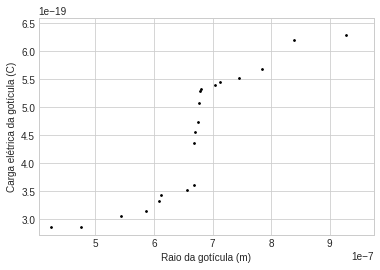

In [13]:
#Plota o gráfico Qxr dos valores nominais dessas grandezas
srlist = rlistNV; srlist.sort()
sQlist = QlistNV; sQlist.sort()
plt.xlim(0.95*srlist[0], 1.05*srlist[19])
plt.ylim(0.95*sQlist[0],1.05*sQlist[19])
plt.xlabel("Raio da gotícula (m)")
plt.ylabel("Carga elétrica da gotícula (C)")
plt.scatter(rlistNV,QlistNV,marker='o',s=3,c=('black'))
plt.show()

In [14]:
ssQlist = Qlist; ssQlist.sort()
L1 = (ssQlist[0]+ssQlist[1]+ssQlist[2]+ssQlist[3])/4
L2 = (ssQlist[4]+ssQlist[5]+ssQlist[6]+ssQlist[7])/4
L3 = (ssQlist[8]+ssQlist[9]+ssQlist[10])/3
L4 = (ssQlist[11]+ssQlist[12]+ssQlist[13]+ssQlist[14]+ssQlist[15]+ssQlist[16]+ssQlist[17])/7
L5 = (ssQlist[18]+ssQlist[19])/2

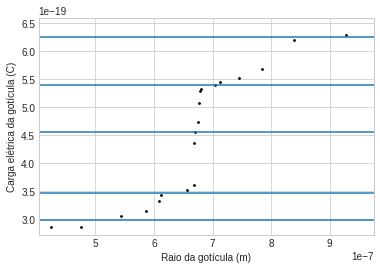

In [15]:
#Plota o gráfico Qxr com barras horizontais
plt.xlim(0.95*srlist[0], 1.05*srlist[19])
plt.ylim(0.95*sQlist[0],1.05*sQlist[19])
plt.xlabel("Raio da gotícula (m)")
plt.ylabel("Carga elétrica da gotícula (C)")
plt.scatter(rlistNV,QlistNV,marker='o',s=3,c=('black'))
plt.axhline(y=L1.n);plt.axhline(y=L2.n);plt.axhline(y=L3.n);plt.axhline(y=L4.n);plt.axhline(y=L5.n)
plt.show()

In [16]:
a1=L1; a2=L2-L1; a3=L3-L2; a4=L4-L3; a5=L5-L4

In [17]:
e = [a1,a2,a3,a4,a5]; e = np.asarray(e); print(e.sum()/5)

(1.250+/-0.024)e-19
